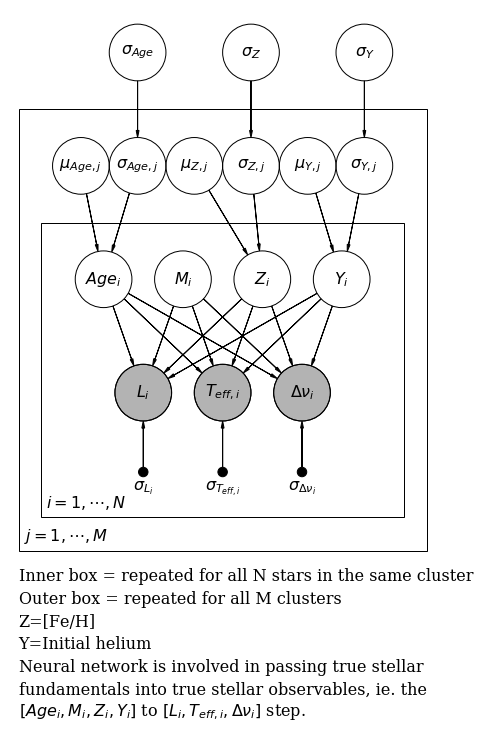

In [60]:
import daft
from matplotlib import rc
rc("font", family="serif", size=16)
x_off=0.5
y_base=1.2
y_off=0.3
pgm = daft.PGM([x_off+x+2.5*0.5+(x_off+x-2.5*0.5-0.6)-0.6+0.4+0.4,y_base+5.2], grid_unit=4, node_unit=2)

#nodes
#obs errs
pgm.add_node('Lobserr',r'$\sigma_{L_i}$',x_off+1,y_base+1,fixed=True,offset=[0,-30])
pgm.add_node('Teffobserr',r'$\sigma_{T_{eff,i}}$',x_off+1.7,y_base+1,fixed=True,offset=[0,-30])
pgm.add_node('delnuobserr',r'$\sigma_{\Delta \nu_i}$',x_off+2.4,y_base+1,fixed=True,offset=[0,-30])

#obs values
pgm.add_node('Lobs',r'$L_i$',x_off+1,y_base+2-y_off,observed=True)
pgm.add_node('Teffobs',r'$T_{eff,i}$',x_off+1.7,y_base+2-y_off,observed=True)
pgm.add_node('delnuobs',r'$\Delta \nu_i$',x_off+2.4,y_base+2-y_off,observed=True)

#true values
pgm.add_node('Age',r'$Age_i$',x_off+1-0.35,y_base+3-y_off)
pgm.add_node('M',r'$M_i$',x_off+1.35,y_base+3-y_off)
pgm.add_node('Z',r'$Z_i$',x_off+2.4-0.35,y_base+3-y_off)
pgm.add_node('Y',r'$Y_i$',x_off+2.4+0.35,y_base+3-y_off)

#star to star parameters
x=1.7
pgm.add_node('mu_Age',r'$\mu_{Age,j}$',x_off+x-2.5*0.5,y_base+4-y_off)
pgm.add_node('sigma_Age',r'$\sigma_{Age,j}$',x_off+x-1.5*0.5,y_base+4-y_off)
pgm.add_node('mu_Z',r'$\mu_{Z,j}$',x_off+x-0.5*0.5,y_base+4-y_off)
pgm.add_node('sigma_Z',r'$\sigma_{Z,j}$',x_off+x+0.5*0.5,y_base+4-y_off)
pgm.add_node('mu_Y',r'$\mu_{Y,j}$',x_off+x+1.5*0.5,y_base+4-y_off)
pgm.add_node('sigma_Y',r'$\sigma_{Y,j}$',x_off+x+2.5*0.5,y_base+4-y_off)

#cluster to cluster parameters
pgm.add_node('Sigma_Age',r'$\sigma_{Age}$',x_off+x-1.5*0.5,y_base+5-y_off)
pgm.add_node('Sigma_Z',r'$\sigma_Z$',x_off+x+0.5*0.5,y_base+5-y_off)
pgm.add_node('Sigma_Y',r'$\sigma_Y$',x_off+x+2.5*0.5,y_base+5-y_off)

#edges
#obs err to obs values
pgm.add_edge('Lobserr','Lobs')
pgm.add_edge('Teffobserr','Teffobs')
pgm.add_edge('delnuobserr','delnuobs')

#true values to obs values (NN)
for obs in ['Lobs','Teffobs','delnuobs']:
    for true in ['Age','M','Z','Y']:
        pgm.add_edge(true,obs)

#star level parameters to true values
for true in ['Age','Z','Y']:
    pgm.add_edge('mu_'+true,true)
    pgm.add_edge('sigma_'+true,true)

#cluster level parameters to star level parameters
pgm.add_edge('Sigma_Age','sigma_Age')
pgm.add_edge('Sigma_Z','sigma_Z')
pgm.add_edge('Sigma_Y','sigma_Y')

#plates
pgm.add_plate([0.6, y_base+0.7, x_off+x+2.5*0.5+(x_off+x-2.5*0.5-0.6)-0.6, 3.5-0.7-y_off], label=r"$i = 1, \cdots, N$",shift=-0.1)
pgm.add_plate([0.4, y_base+0.4, x_off+x+2.5*0.5+(x_off+x-2.5*0.5-0.6)-0.6+0.4, 4.5-0.4-y_off], label=r"$j = 1, \cdots, M$",shift=-0.1)

#text
pgm.add_text(0.4,1.2,'Inner box = repeated for all N stars in the same cluster')
pgm.add_text(0.4,1,'Outer box = repeated for all M clusters')
pgm.add_text(0.4,0.8,'Z=[Fe/H]')
pgm.add_text(0.4,0.6,'Y=Initial helium')
pgm.add_text(0.4,0.4,'Neural network is involved in passing true stellar')
pgm.add_text(0.4,0.2,'fundamentals into true stellar observables, ie. the')
pgm.add_text(0.4,0.0,r'$[Age_i,M_i,Z_i,Y_i]$'+' to '+r'$[L_i,T_{eff,i},\Delta \nu_i]$'+' step.')
pgm.render()